In [1]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from aux_functions import *

<div class="alert alert-block alert-info">
<h2>(1) A simple noise model with depolarizing noise</h2>

In [2]:
# Depolarizing error rates
single_qubit_error_rate = 0.02
two_qubit_error_rate = 0.01
noise_model_depolarization = depolarizing_noise_model(single_qubit_error_rate, two_qubit_error_rate)

print(noise_model_depolarization)

NoiseModel:
  Basis gates: ['cx', 'id', 'rx', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'rx', 'rz', 'u1', 'u3', 'cx']
  All-qubits errors: ['u1', 'u2', 'u3', 'rx', 'rz', 'cx']


<div class="alert alert-block alert-info">
<h2>(2) Creating different circuits to test the noise models and choose the observable to measure</h2>

<div class="alert alert-block alert-success">
<h3>Creating circuits and corresponding ideal simulation</h3>
example circuit: n-qubit GHZ state

        ┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■─────────────░─┤M├─────────
        └───┘┌─┴─┐           ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──■────────░──╫─┤M├──────
             └───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──■───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3 


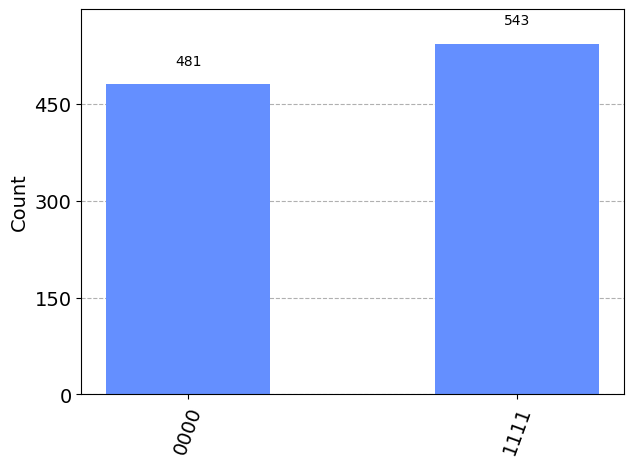

In [3]:
num_qubits = 4
circ1 = generate_GHZ(num_qubits)
print(circ1)
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circ1).result()
plot_histogram(result_ideal.get_counts(0))

<div class="alert alert-block alert-success">
<h3>Testing the GHZ circuits with the noise model and simulating it</h3>

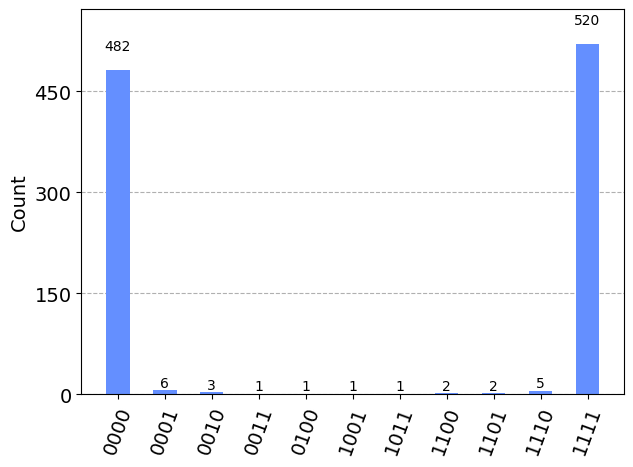

In [4]:
sim_noise = AerSimulator(noise_model=noise_model_depolarization)
circ_noise = transpile(circ1, sim_noise)
result_noise = sim_noise.run(circ_noise).result()
counts_noise = result_noise.get_counts()
plot_histogram(counts_noise)

<div class="alert alert-block alert-success">
<h3>Generating a quantum circuit with random angles and layers</h3>

In [5]:
num_layers = 1
num_qubits = 4
state_vector_dim = 2**num_qubits
rotation_angles = np.pi*np.random.rand(num_layers, num_qubits)
circ = generate_layered_circuit(num_layers, num_qubits, rotation_angles)
print(circ)

      ┌────────────┐               
q_0: ─┤ Rz(2.7405) ├──■────────────
     ┌┴────────────┤┌─┴─┐          
q_1: ┤ Rz(0.31318) ├┤ X ├──■───────
     └┬────────────┤└───┘┌─┴─┐     
q_2: ─┤ Rz(2.1723) ├─────┤ X ├──■──
      ├────────────┤     └───┘┌─┴─┐
q_3: ─┤ Rz(0.5992) ├──────────┤ X ├
      └────────────┘          └───┘


<div class="alert alert-block alert-success">
<h3>Run corresponding ideal simulation</h3>

         ┌────────────┐                ░ ┌─┐         
   q_0: ─┤ Rz(2.7405) ├──■─────────────░─┤M├─────────
        ┌┴────────────┤┌─┴─┐           ░ └╥┘┌─┐      
   q_1: ┤ Rz(0.31318) ├┤ X ├──■────────░──╫─┤M├──────
        └┬────────────┤└───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
   q_2: ─┤ Rz(2.1723) ├─────┤ X ├──■───░──╫──╫─┤M├───
         ├────────────┤     └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ─┤ Rz(0.5992) ├──────────┤ X ├─░──╫──╫──╫─┤M├
         └────────────┘          └───┘ ░  ║  ║  ║ └╥┘
meas: 4/══════════════════════════════════╩══╩══╩══╩═
                                          0  1  2  3 


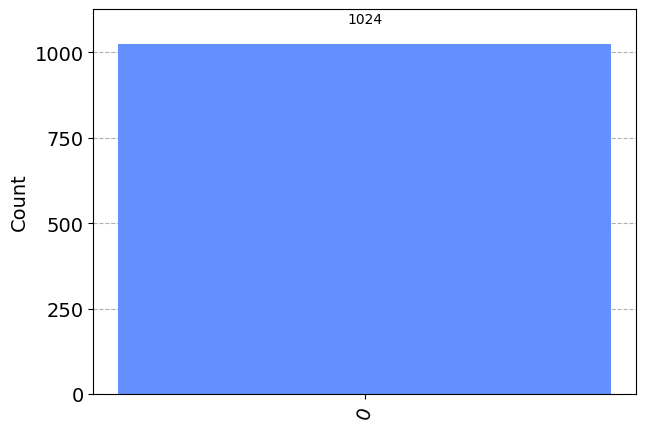

In [6]:
sim_ideal = AerSimulator()
circ_ideal = generate_layered_circuit(num_layers, num_qubits, rotation_angles)
circ_ideal.measure_all()
print(circ_ideal)
result_ideal = sim_ideal.run(circ_ideal).result()
counts_ideal = result_ideal.get_counts()
counts_ideal_dict = {int(z, 2): counts for z, counts in counts_ideal.items()}
plot_histogram(counts_ideal_dict)

<div class="alert alert-block alert-success">
<h3>Run corresponding noise simulation</h3>

         ┌────────────┐                ░ ┌─┐         
   q_0: ─┤ Rz(2.7405) ├──■─────────────░─┤M├─────────
        ┌┴────────────┤┌─┴─┐           ░ └╥┘┌─┐      
   q_1: ┤ Rz(0.31318) ├┤ X ├──■────────░──╫─┤M├──────
        └┬────────────┤└───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
   q_2: ─┤ Rz(2.1723) ├─────┤ X ├──■───░──╫──╫─┤M├───
         ├────────────┤     └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ─┤ Rz(0.5992) ├──────────┤ X ├─░──╫──╫──╫─┤M├
         └────────────┘          └───┘ ░  ║  ║  ║ └╥┘
meas: 4/══════════════════════════════════╩══╩══╩══╩═
                                          0  1  2  3 


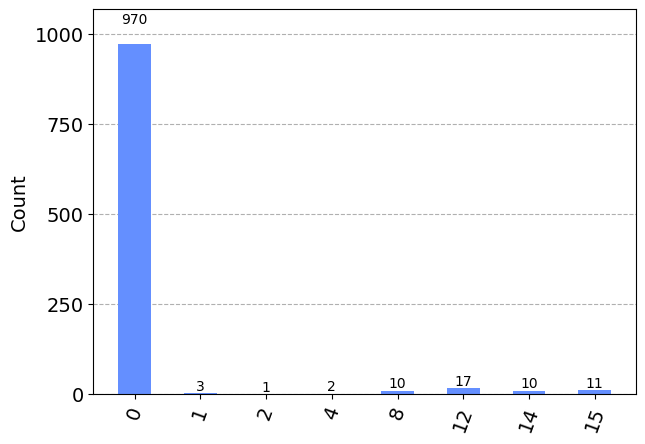

In [7]:
sim_noise = AerSimulator(noise_model=noise_model_depolarization)
circ_noise = generate_layered_circuit(num_layers, num_qubits, rotation_angles)
circ_noise.measure_all()
print(circ_noise)
result_noise = sim_noise.run(circ_noise).result()
counts_noise = result_noise.get_counts(0)
counts_noise_dict = {int(z, 2): counts for z, counts in counts_noise.items()}
plot_histogram(counts_noise_dict)

<div class="alert alert-block alert-info">
<h2>(3, 4) The the zero-noise limit</h2>
Applying the unitary folding method then the extrapolation method

In [8]:
num_folds = 10
prob_noise_list = []
prob_unmitigated_list = []
for fold_num in range(1, num_folds):
    # Compute the noisy probabilities with unitary folding
    prob_noise = unitary_folding(fold_num, num_layers, num_qubits, rotation_angles, 
                                 sim_noise, state_vector_dim)
    prob_noise_list.append(prob_noise)
    # Compute the unmitigated probabilities (no folding)
    prob_unmitigated = unitary_folding(1, num_layers, num_qubits, rotation_angles, 
                                       sim_noise, state_vector_dim)
    prob_unmitigated_list.append(prob_unmitigated)

prob_noise_list = np.array(prob_noise_list)
prob_unmitigated_list = np.array(prob_unmitigated_list)

<div class="alert alert-block alert-info">
<h2>(5) Comparing mitigated and unmitigated results</h2>

In [9]:
prob_ideal = probabilities(counts_ideal_dict, state_vector_dim)
prob_unmitigated = probabilities(counts_noise_dict, state_vector_dim)

<div class="alert alert-block alert-success">
<h3>extrapolation method using polynomial fit for the probabilities:</h3>

Ideal probability for outcome '0': 1.0
Probability without error mitigation for outcome '0': 0.947265625
Probability with error mitigation for outcome '0': 0.85


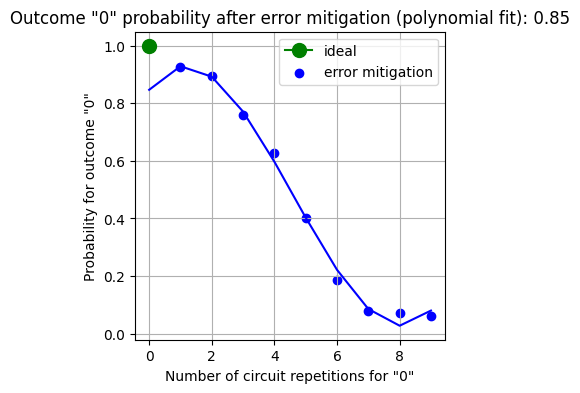

Ideal probability for outcome '1': 0.0
Probability without error mitigation for outcome '1': 0.0029296875
Probability with error mitigation for outcome '1': 0.02


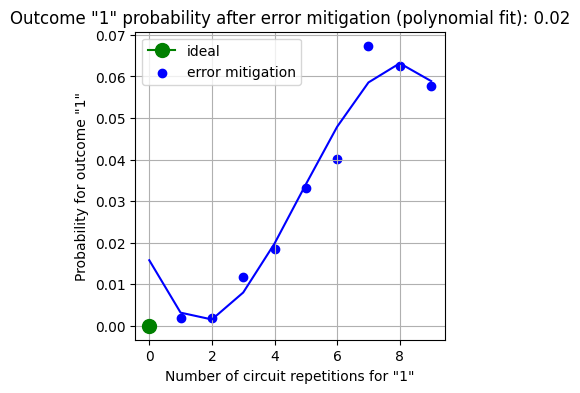

Ideal probability for outcome '2': 0.0
Probability without error mitigation for outcome '2': 0.0009765625
Probability with error mitigation for outcome '2': 0.01


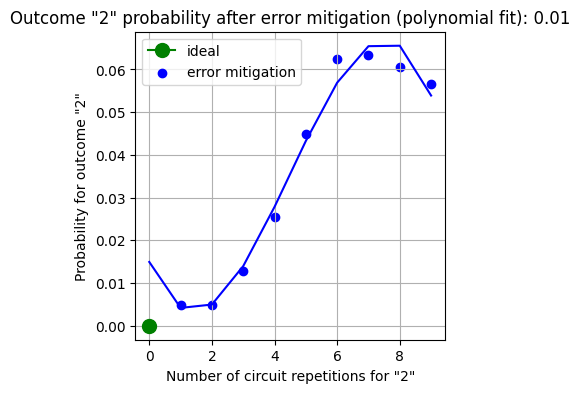

Ideal probability for outcome '3': 0.0
Probability without error mitigation for outcome '3': 0.0
Probability with error mitigation for outcome '3': -0.0


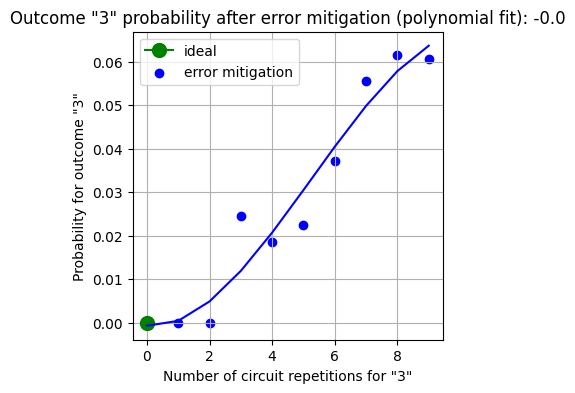

Ideal probability for outcome '4': 0.0
Probability without error mitigation for outcome '4': 0.001953125
Probability with error mitigation for outcome '4': -0.02


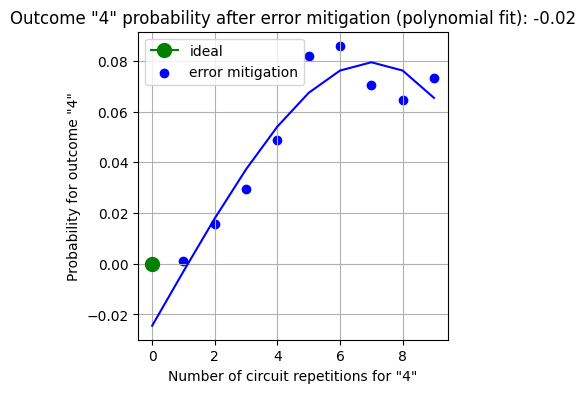

Ideal probability for outcome '5': 0.0
Probability without error mitigation for outcome '5': 0.0
Probability with error mitigation for outcome '5': 0.0


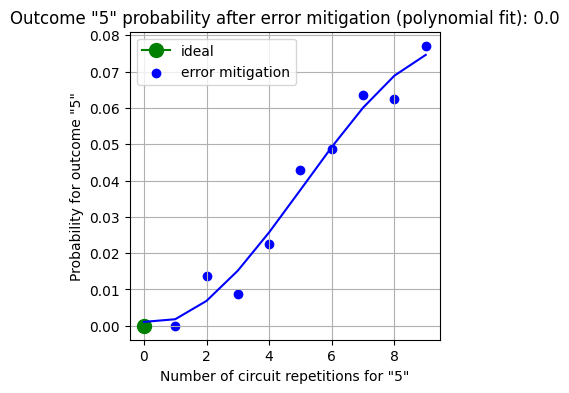

Ideal probability for outcome '6': 0.0
Probability without error mitigation for outcome '6': 0.0
Probability with error mitigation for outcome '6': 0.02


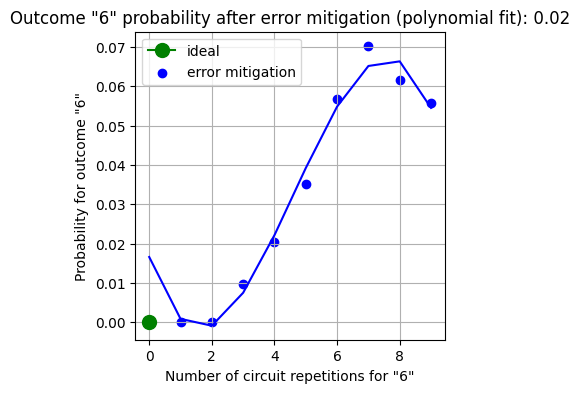

Ideal probability for outcome '7': 0.0
Probability without error mitigation for outcome '7': 0.0
Probability with error mitigation for outcome '7': 0.01


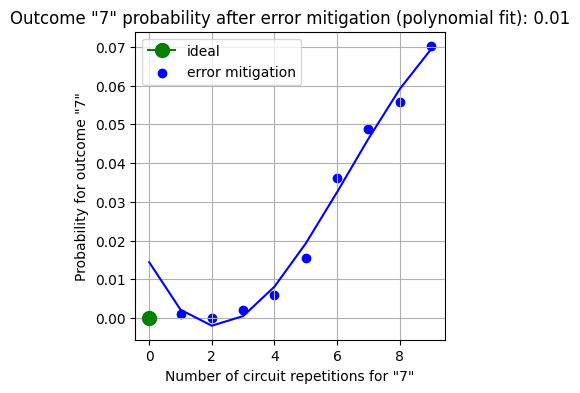

Ideal probability for outcome '8': 0.0
Probability without error mitigation for outcome '8': 0.009765625
Probability with error mitigation for outcome '8': -0.0


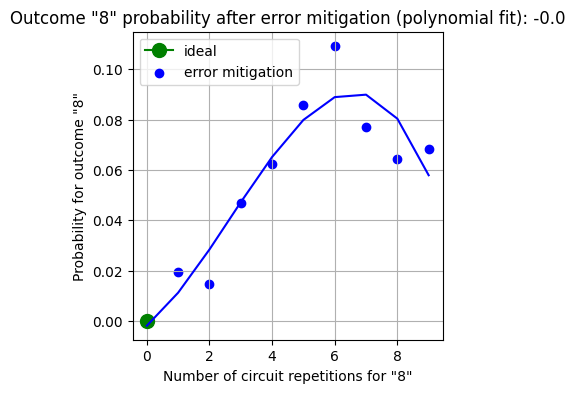

Ideal probability for outcome '9': 0.0
Probability without error mitigation for outcome '9': 0.0
Probability with error mitigation for outcome '9': 0.01


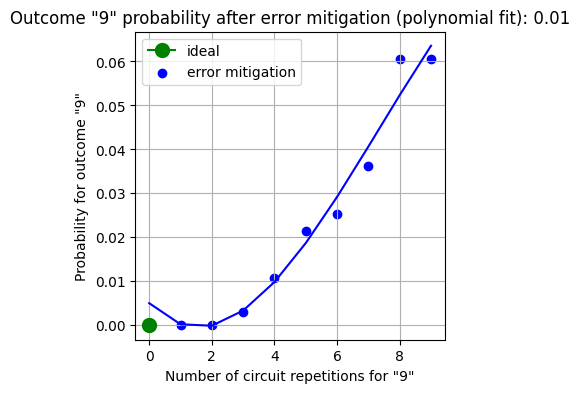

Ideal probability for outcome '10': 0.0
Probability without error mitigation for outcome '10': 0.0
Probability with error mitigation for outcome '10': 0.02


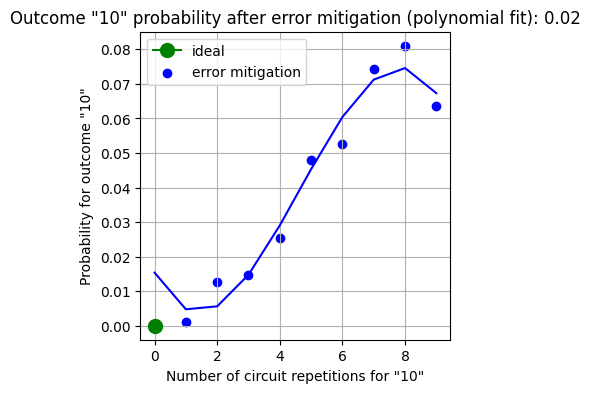

Ideal probability for outcome '11': 0.0
Probability without error mitigation for outcome '11': 0.0
Probability with error mitigation for outcome '11': 0.03


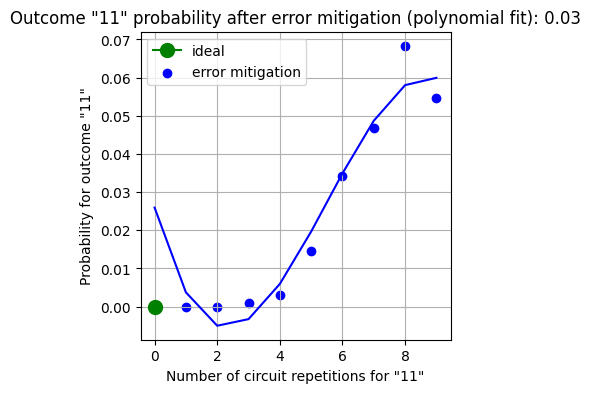

Ideal probability for outcome '12': 0.0
Probability without error mitigation for outcome '12': 0.0166015625
Probability with error mitigation for outcome '12': -0.02


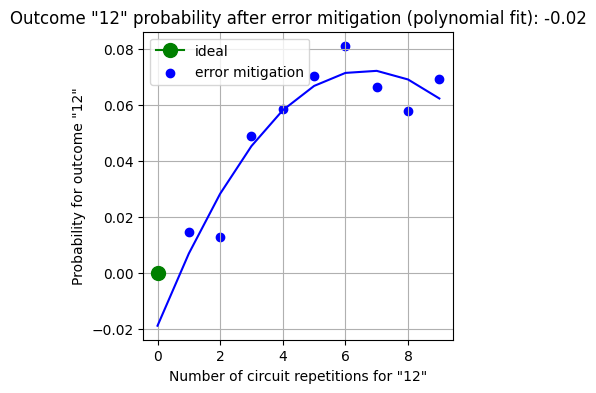

Ideal probability for outcome '13': 0.0
Probability without error mitigation for outcome '13': 0.0
Probability with error mitigation for outcome '13': 0.02


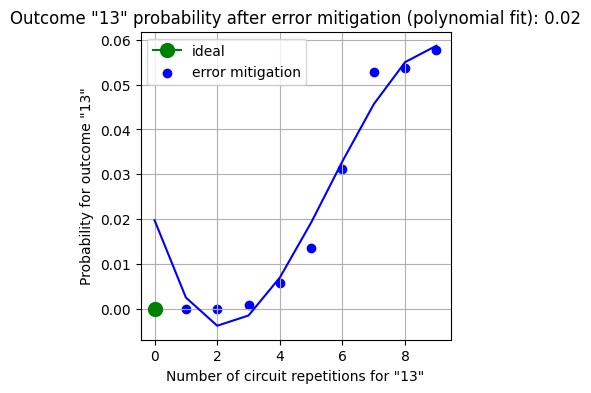

Ideal probability for outcome '14': 0.0
Probability without error mitigation for outcome '14': 0.009765625
Probability with error mitigation for outcome '14': 0.04


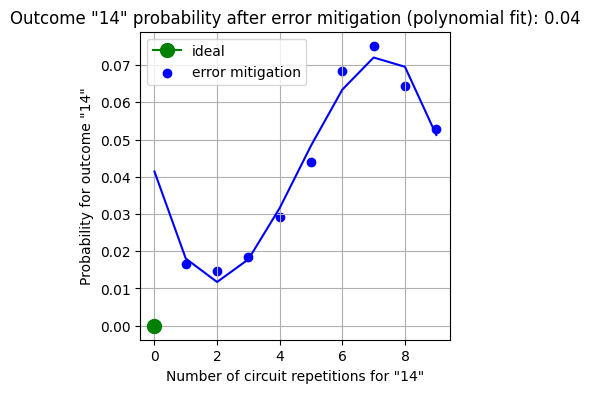

Ideal probability for outcome '15': 0.0
Probability without error mitigation for outcome '15': 0.0107421875
Probability with error mitigation for outcome '15': 0.03


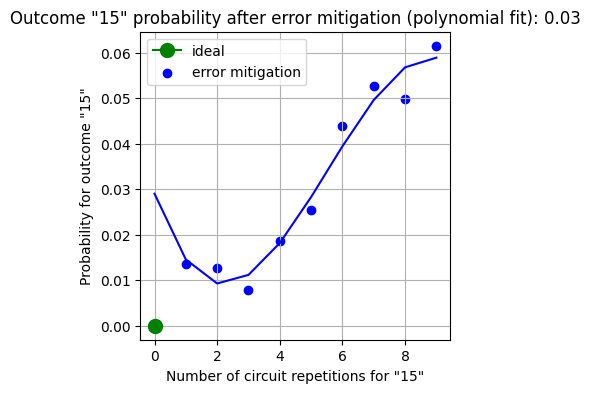

In [10]:
poly_degrees = 3
fit_function_polynomial = lambda x, y: fit_polynomial(x, y, poly_degrees)
for outcome in range(state_vector_dim):
    params = {
        'probabilities': prob_noise_list[:,outcome],
        'outcome': outcome,
        'ideal_probability': prob_ideal[outcome],
        'unmitigated_probability': prob_unmitigated[outcome],
        'num_folds': num_folds,
        'fit_function': fit_function_polynomial,
        'fit_type': "polynomial"
        }
    plot_probabilities(params)

<div class="alert alert-block alert-success">
<h3>extrapolation method using exponential fit for the probabilities:</h3>

Ideal probability for outcome '0': 1.0
Probability without error mitigation for outcome '0': 0.947265625
Probability with error mitigation for outcome '0': 1.19


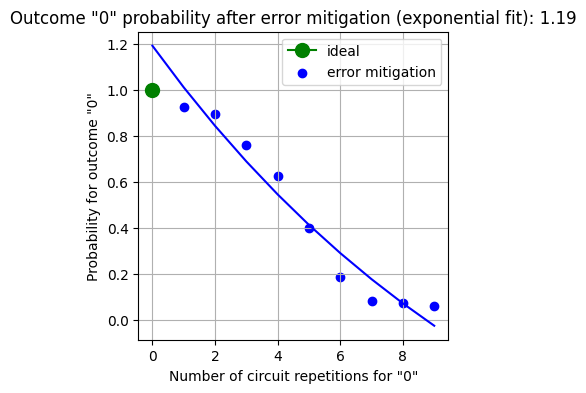

Ideal probability for outcome '1': 0.0
Probability without error mitigation for outcome '1': 0.0029296875
Probability with error mitigation for outcome '1': -0.01


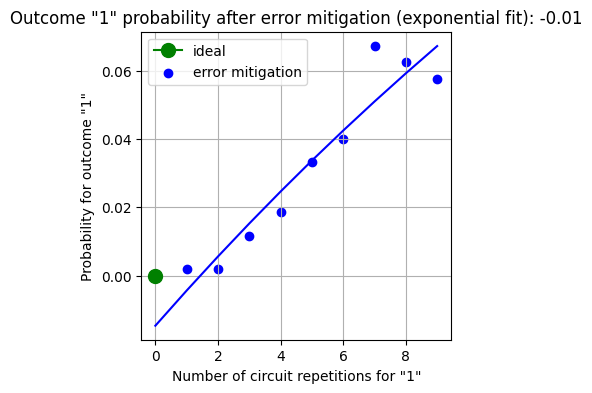

Ideal probability for outcome '2': 0.0
Probability without error mitigation for outcome '2': 0.0009765625
Probability with error mitigation for outcome '2': -0.02


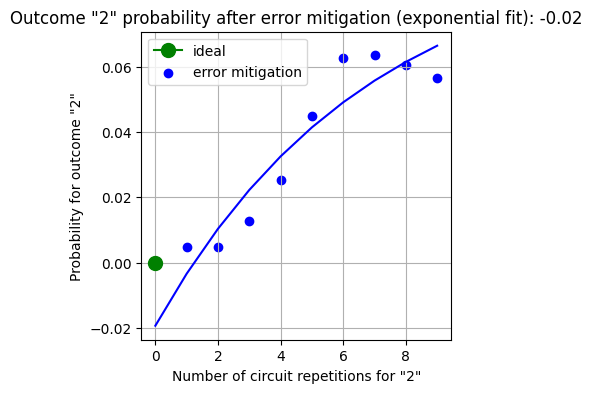

Ideal probability for outcome '3': 0.0
Probability without error mitigation for outcome '3': 0.0
Probability with error mitigation for outcome '3': -0.01


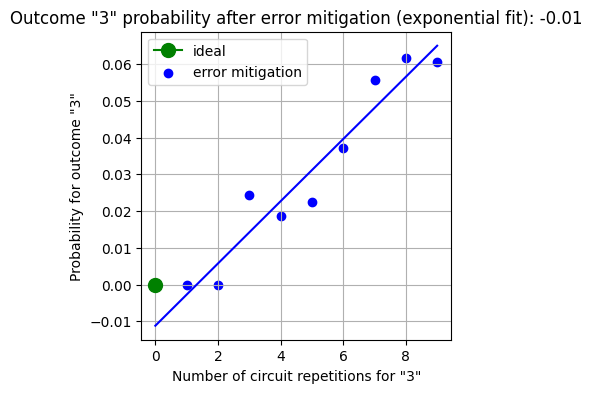

Ideal probability for outcome '4': 0.0
Probability without error mitigation for outcome '4': 0.001953125
Probability with error mitigation for outcome '4': -0.05


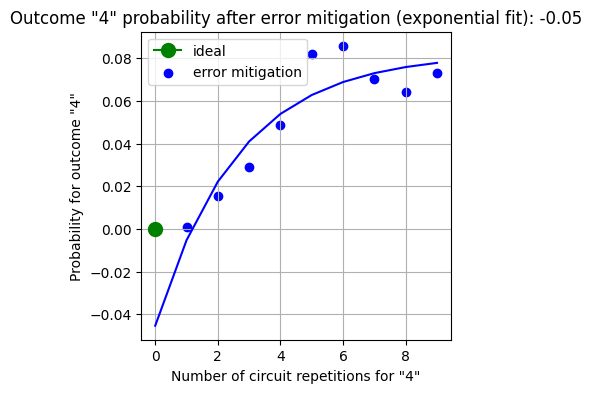

Ideal probability for outcome '5': 0.0
Probability without error mitigation for outcome '5': 0.0
Probability with error mitigation for outcome '5': -0.01


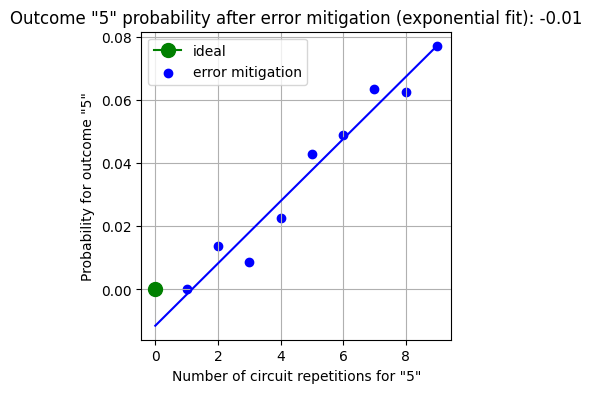

Ideal probability for outcome '6': 0.0
Probability without error mitigation for outcome '6': 0.0
Probability with error mitigation for outcome '6': -0.02


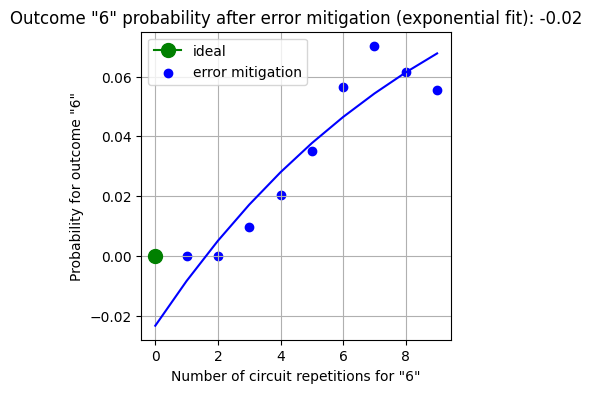

Ideal probability for outcome '7': 0.0
Probability without error mitigation for outcome '7': 0.0
Probability with error mitigation for outcome '7': -0.02


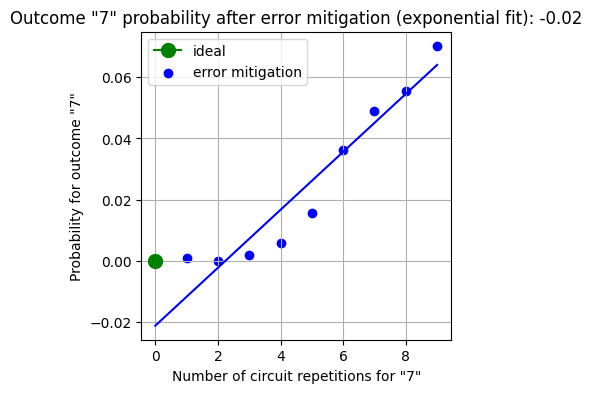

Ideal probability for outcome '8': 0.0
Probability without error mitigation for outcome '8': 0.009765625
Probability with error mitigation for outcome '8': -0.03


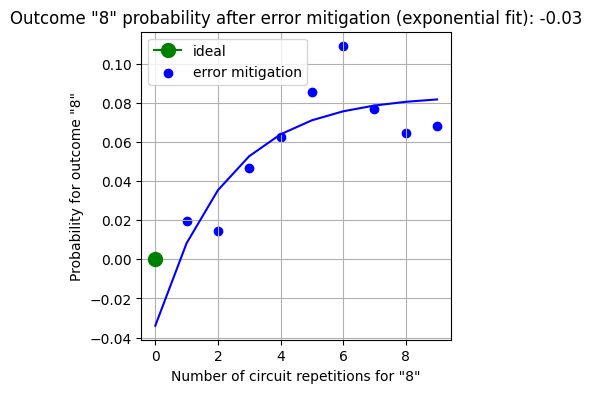

Ideal probability for outcome '9': 0.0
Probability without error mitigation for outcome '9': 0.0
Probability with error mitigation for outcome '9': -0.02


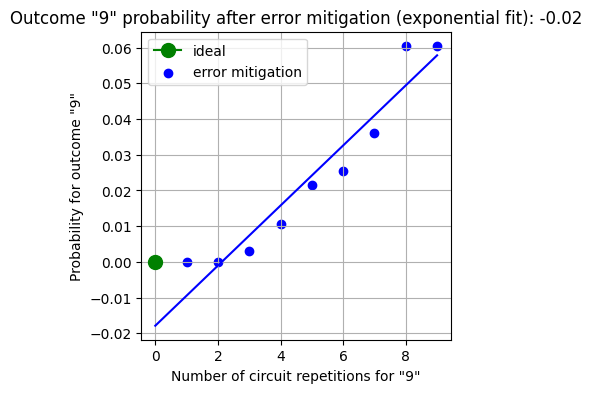

Ideal probability for outcome '10': 0.0
Probability without error mitigation for outcome '10': 0.0
Probability with error mitigation for outcome '10': -0.02


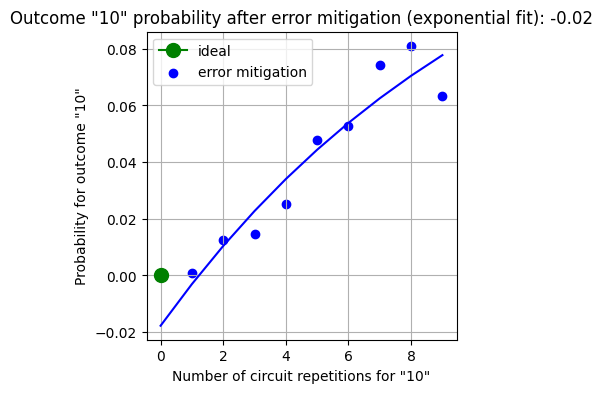

Ideal probability for outcome '11': 0.0
Probability without error mitigation for outcome '11': 0.0
Probability with error mitigation for outcome '11': -0.02


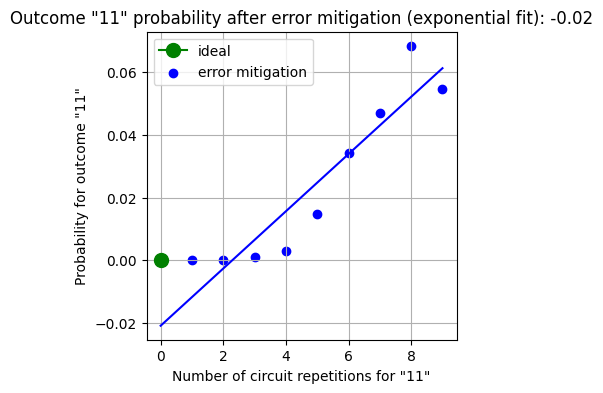

Ideal probability for outcome '12': 0.0
Probability without error mitigation for outcome '12': 0.0166015625
Probability with error mitigation for outcome '12': -0.03


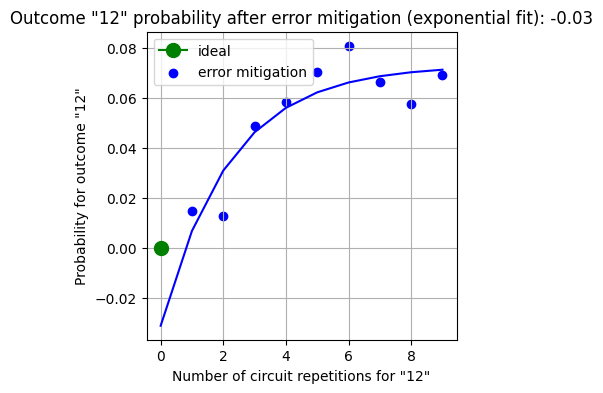

Ideal probability for outcome '13': 0.0
Probability without error mitigation for outcome '13': 0.0
Probability with error mitigation for outcome '13': -0.02


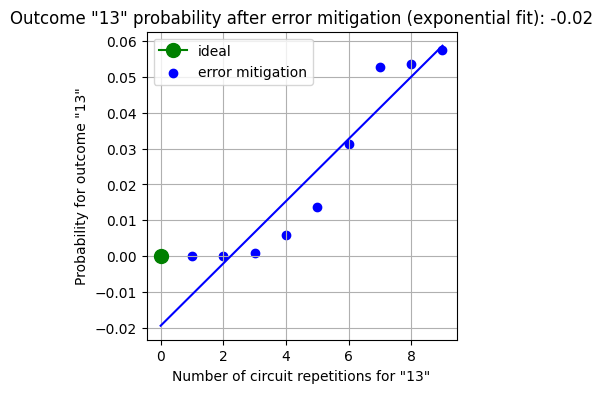

Ideal probability for outcome '14': 0.0
Probability without error mitigation for outcome '14': 0.009765625
Probability with error mitigation for outcome '14': -0.01


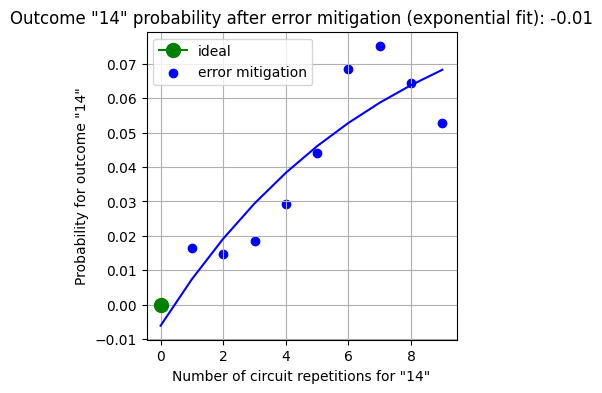

Ideal probability for outcome '15': 0.0
Probability without error mitigation for outcome '15': 0.0107421875
Probability with error mitigation for outcome '15': -0.0


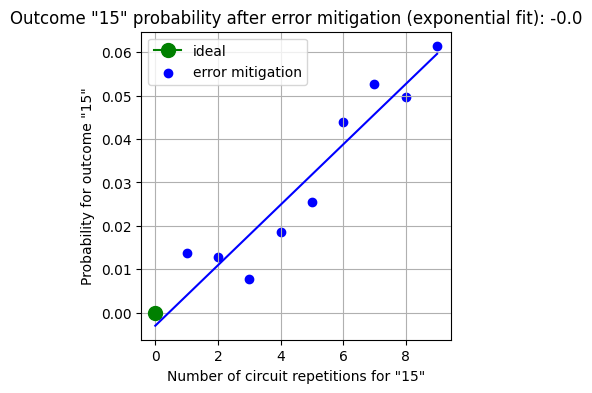

In [11]:
for outcome in range(state_vector_dim):
    params = {
        'probabilities': prob_noise_list[:,outcome],
        'outcome': outcome,
        'ideal_probability': prob_ideal[outcome],
        'unmitigated_probability': prob_unmitigated[outcome],
        'num_folds': num_folds,
        'fit_function': fit_exponential,
        'fit_type': "exponential"
        }

    plot_probabilities(params)

<div class="alert alert-block alert-success">
<h3>extrapolation method using linear fit for the probabilities:</h3>

Ideal probability for outcome '0': 1.0
Probability without error mitigation for outcome '0': 0.947265625
Probability with error mitigation for outcome '0': 1.09


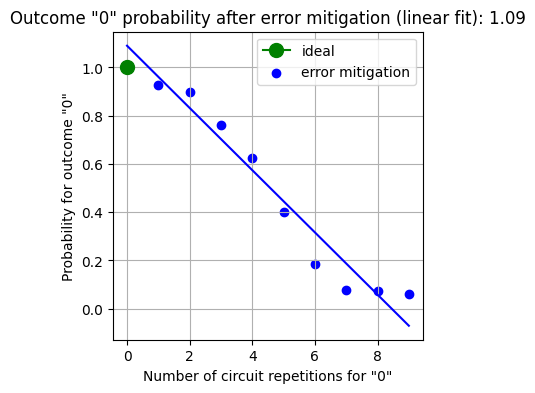

Ideal probability for outcome '1': 0.0
Probability without error mitigation for outcome '1': 0.0029296875
Probability with error mitigation for outcome '1': -0.01


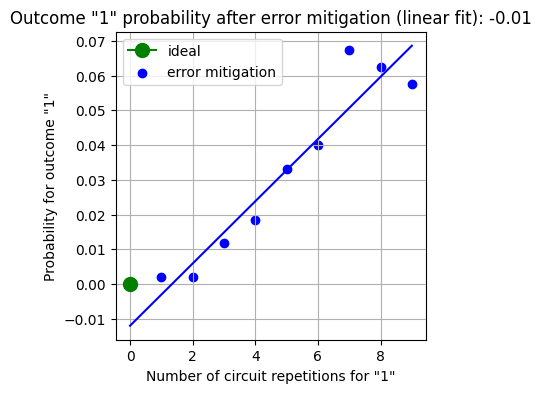

Ideal probability for outcome '2': 0.0
Probability without error mitigation for outcome '2': 0.0009765625
Probability with error mitigation for outcome '2': -0.01


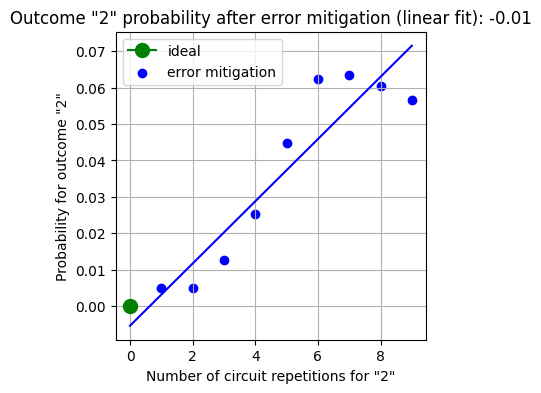

Ideal probability for outcome '3': 0.0
Probability without error mitigation for outcome '3': 0.0
Probability with error mitigation for outcome '3': -0.01


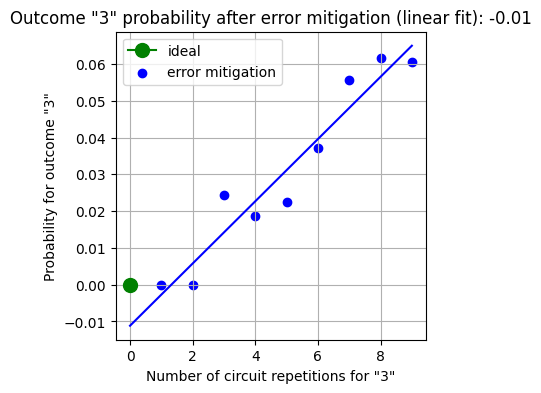

Ideal probability for outcome '4': 0.0
Probability without error mitigation for outcome '4': 0.001953125
Probability with error mitigation for outcome '4': 0.01


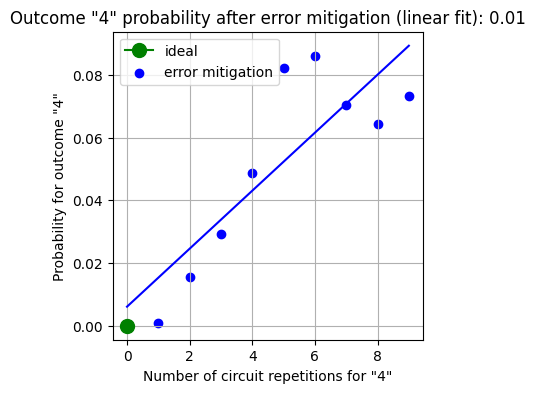

Ideal probability for outcome '5': 0.0
Probability without error mitigation for outcome '5': 0.0
Probability with error mitigation for outcome '5': -0.01


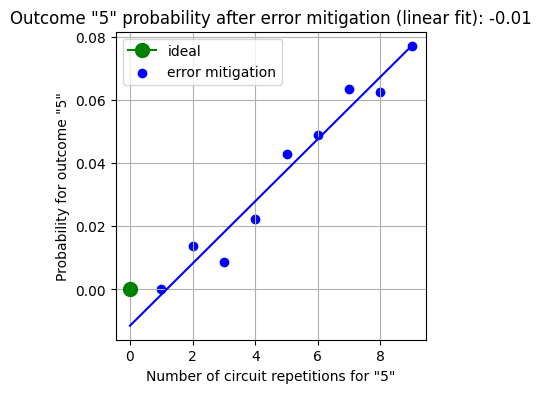

Ideal probability for outcome '6': 0.0
Probability without error mitigation for outcome '6': 0.0
Probability with error mitigation for outcome '6': -0.01


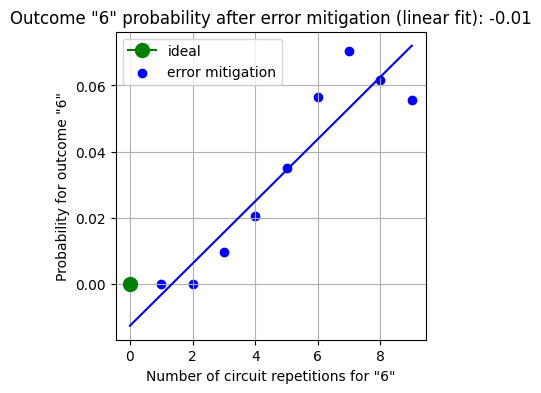

Ideal probability for outcome '7': 0.0
Probability without error mitigation for outcome '7': 0.0
Probability with error mitigation for outcome '7': -0.02


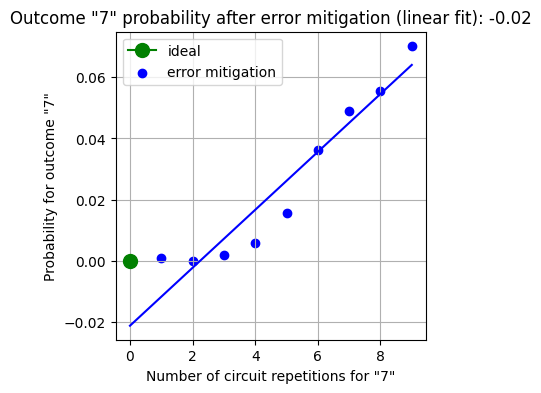

Ideal probability for outcome '8': 0.0
Probability without error mitigation for outcome '8': 0.009765625
Probability with error mitigation for outcome '8': 0.02


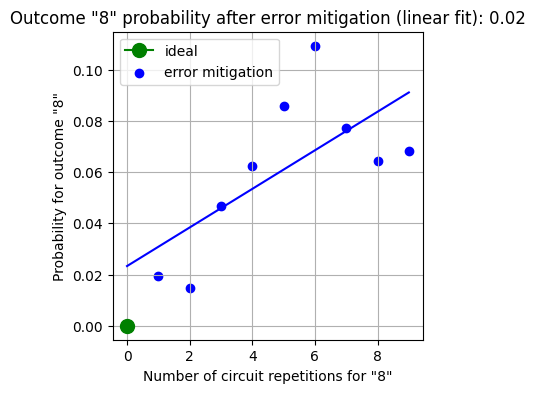

Ideal probability for outcome '9': 0.0
Probability without error mitigation for outcome '9': 0.0
Probability with error mitigation for outcome '9': -0.02


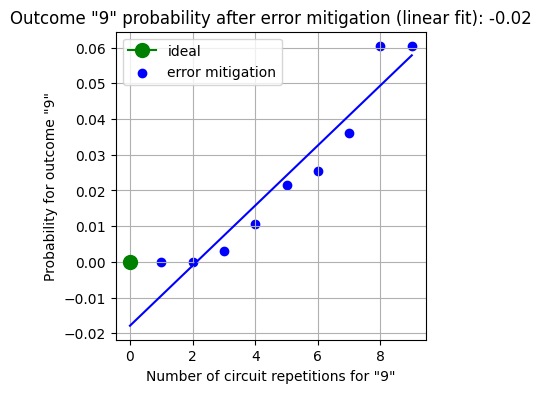

Ideal probability for outcome '10': 0.0
Probability without error mitigation for outcome '10': 0.0
Probability with error mitigation for outcome '10': -0.01


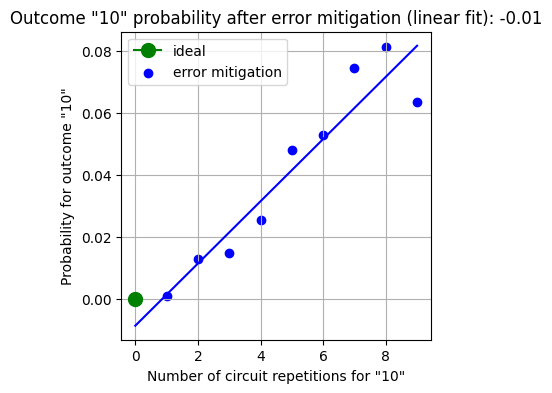

Ideal probability for outcome '11': 0.0
Probability without error mitigation for outcome '11': 0.0
Probability with error mitigation for outcome '11': -0.02


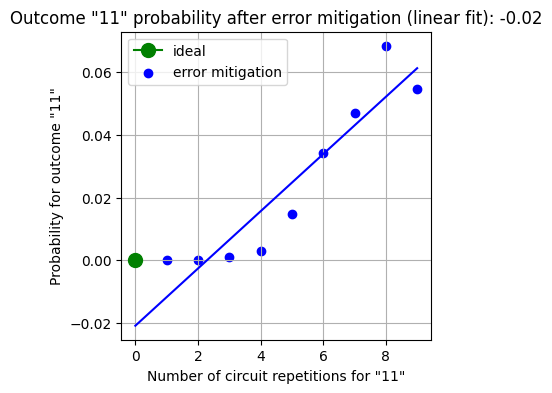

Ideal probability for outcome '12': 0.0
Probability without error mitigation for outcome '12': 0.0166015625
Probability with error mitigation for outcome '12': 0.02


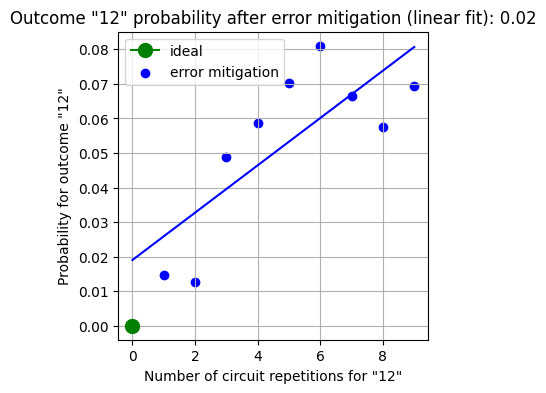

Ideal probability for outcome '13': 0.0
Probability without error mitigation for outcome '13': 0.0
Probability with error mitigation for outcome '13': -0.02


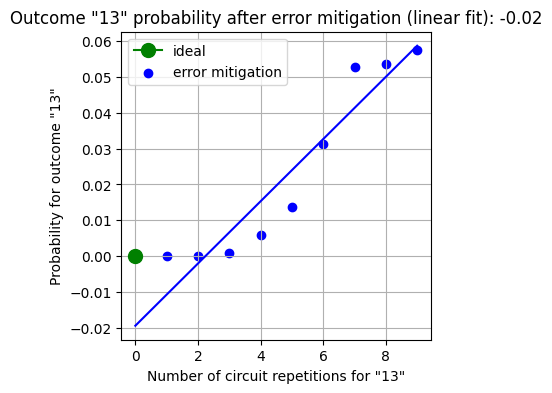

Ideal probability for outcome '14': 0.0
Probability without error mitigation for outcome '14': 0.009765625
Probability with error mitigation for outcome '14': 0.01


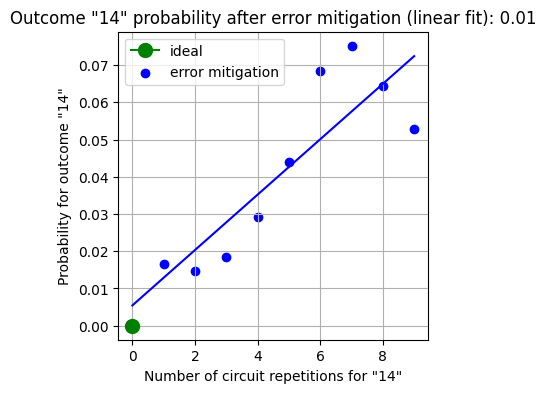

Ideal probability for outcome '15': 0.0
Probability without error mitigation for outcome '15': 0.0107421875
Probability with error mitigation for outcome '15': -0.0


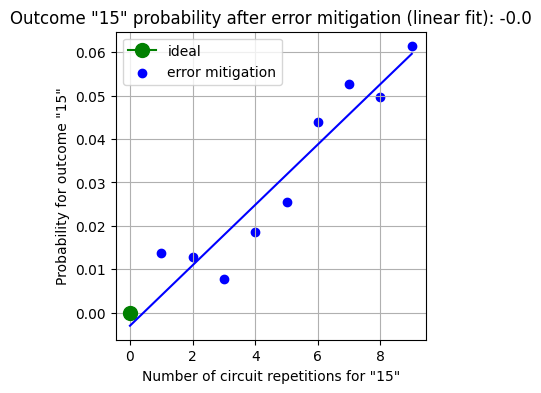

In [12]:
for outcome in range(state_vector_dim):
    params = {
        'probabilities': prob_noise_list[:,outcome],
        'outcome': outcome,
        'ideal_probability': prob_ideal[outcome],
        'unmitigated_probability': prob_unmitigated[outcome],
        'num_folds': num_folds,
        'fit_function': fit_linear,
        'fit_type': "linear"
        }
    plot_probabilities(params)

<div class="alert alert-block alert-warning">
Notes:

- polynomial fitting looks the best in this case
- negative probabilities are due to overfitting in the error mitigation or failure in the fitting function to capture the datapoints, it is false ofcourse
- probabilities higher than 1 can be also due to fitting function failure